# Aeroelastic Analysis of Fixed Swept Wing

This notebook follows the flutter analysis of a swept wing, modeled as a cantilever wing. A Ritz-Galerikin approximation is used for the computation of the coupled bending-torsional proper orthogonal frquencies, and a quasi-steady strip theory approximation for the aerodynamic behaviour.

The Flutter is computed at a Mach = 0.7. After finding the flutter dynamic pressure, the response to a 1-cosine discrete gust will be simulated at a dynamic pressure 15% bellow the flutter condition. The length of the gust is the minimal required by the CS-25 standard.

P.S: The following work will be updated to include a divergence and control reversal analysis.

# Wing Model
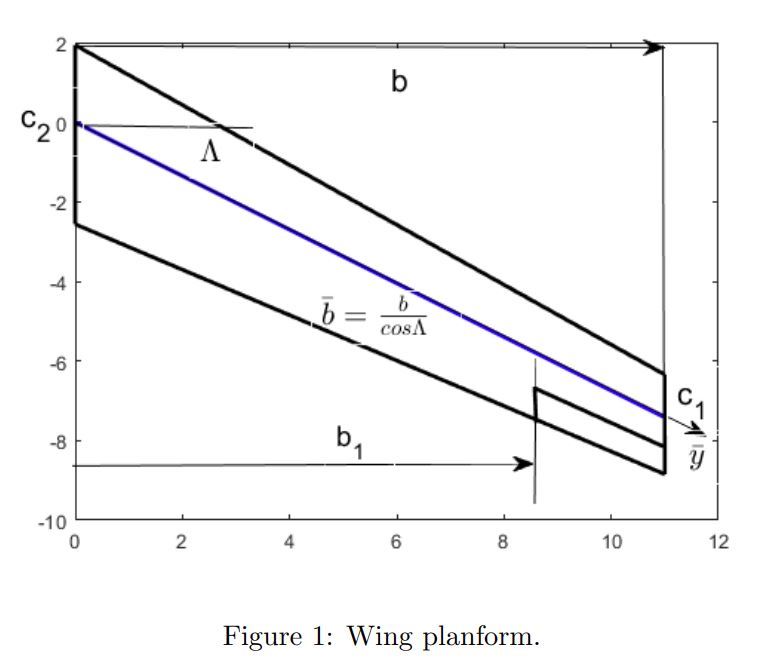

We begin by defining the wing data:

In [1]:
% Symbolic Matlab
syms ybar a rho Vg

lamda = 34; % Sweep angle of the wing
b = 11; % Semi span (m)
bbar = b/cosd(lamda); % Semi span in the local reference frame, the transformation from the wind frame to the local frame 
% requires dividing by /cosd(lamda);
c1 = 4.5; % Root chord length (m)
c2 = 2.5; % Tip chord length (m)
Mach = 0.7; % Mach number
Cla0 = 2*pi; % Aerodynamic coefficient at rest
Cla = Cla0/(sqrt(1-Mach^2)); % Aerodynamic coefficient
Clabar = Cla/cosd(lamda); % Aerodynamic coefficients in local frame
E = 0.25; % Aerodynamic center position (1/4 of the chord)
zeta = 0.02; % Structural Damping

% Data EI, GJ, m, Inertia wrt EA (It), xcg
EI = 10^6*(6.7 - 5*(ybar/bbar));
GJ = 10^6*(9.38 - 6.25*(ybar/bbar))*0.5;
m = 68 - 23*(ybar/bbar);
It = 160 - 51*(ybar/bbar);
xcg = 0.38 - 0.5*(ybar/bbar);

Since the wing is swept, the derivation of the principle of virtual work will be done in the local frame of reference.

The Ritz-Galerikin approximation is chosen as follows:

$
\begin{aligned}
& \mathbf{n}_w(\bar{y})=\left[\begin{array}{lllll}
(\bar{y} / \bar{b})^2 & (\bar{y} / \bar{b})^3 & (\bar{y} / \bar{b})^4 & (\bar{y} / \bar{b})^5 & (\bar{y} / \bar{b})^6
\end{array}\right] \\
& \mathbf{n}_t(\bar{y})=\left[\begin{array}{llll}
\sin \left(\frac{\bar{y}}{2} \frac{\bar{y}}{\bar{b}}\right) & \sin \left(2 \frac{\bar{y}}{2} \frac{\bar{y}}{\bar{b}}\right) & \sin \left(3 \frac{\bar{y}}{2} \overline{\bar{b}}\right) & \sin \left(4 \frac{\bar{y}}{2} \frac{\bar{y}}{\bar{b}}\right)
\end{array}\right] \\
&
\end{aligned}
$

$w(\bar{y}, t)=\mathbf{n}_w(\bar{y}) \mathbf{q}_w(t)=\left[\begin{array}{lllll}
(\bar{y} / \bar{b})^2 & (\bar{y} / \bar{b})^3 & (\bar{y} / \bar{b})^4 & (\bar{y} / \bar{b})^5 & (\bar{y} / \bar{b})^6
\end{array}\right]\left[\begin{array}{l}
q_{w 2} \\
q_{w 3} \\
q_{w 4} \\
q_{w 5} \\
q_{w 6}
\end{array}\right]
$
$
\theta(\bar{y}, t)=\mathbf{n}_\theta(\bar{y}) \mathbf{q}_\theta(t)=\left[\sin \left(\frac{\bar{y}}{2} \frac{\bar{y}}{\bar{b}}\right) \quad \sin \left(2 \frac{\bar{y}}{2} \frac{\bar{y}}{\bar{b}}\right) \quad \sin \left(3 \frac{\bar{y}}{2} \frac{\bar{y}}{\bar{b}}\right) \quad \sin \left(4 \frac{\bar{y}}{2} \frac{\bar{y}}{\bar{b}}\right)\right]\left[\begin{array}{l}
q_{\theta 1} \\
q_{\theta 2} \\
q_{\theta 3} \\
q_{\theta 4}
\end{array}\right]
$

The unloaded wing has the following structural model matrices:

$
\begin{aligned}
\mathbf{K}_{w w} \mathbf{q}_w & =\frac{\partial \delta \mathcal{W}_{\mathrm{el}}}{\partial \delta \mathbf{q}_w}=\int_0^b \mathbf{n}_{w / \bar{y} \bar{y}}(\bar{y})^T E I(\bar{y}) \mathbf{n}_{w / \bar{y}}(\bar{y})^T \mathrm{~d} \bar{y} \mathbf{q}_w \\
\mathbf{K}_{\theta \theta} \mathbf{q}_\theta & =\frac{\partial \delta \mathcal{W}_{\mathrm{el}}}{\partial \delta \mathbf{q}_\theta}=\int_0^{\bar{b}} \mathbf{n}_{\theta / \bar{y}}(\bar{y})^T G J(\bar{y}) \mathbf{n}_{\theta / \bar{y}}(\bar{y})^T \mathrm{~d} \bar{y} \mathbf{q}_\theta \\
\mathbf{M}_{w w} \ddot{\mathbf{q}}_w & =\frac{\partial \delta \mathcal{W}_{\text {ine }}}{\partial \delta \mathbf{q}_w}=\int_0^{\bar{b}} \mathbf{n}_w(\bar{y})^T m(\bar{y}) \mathbf{n}_w(\bar{y})^T \mathrm{~d} \bar{y} \ddot{\mathbf{q}}_w \\
\mathbf{M}_{\theta \theta} \ddot{\mathbf{q}}_w & =\frac{\partial \delta \mathcal{W}_{\text {ine }}}{\partial \delta \mathbf{q}_w}=\int_0^{\bar{b}} \mathbf{n}_\theta(\bar{y})^T I_\theta(\bar{y}) \mathbf{n}_\theta(\bar{y})^T \mathrm{~d} \bar{y} \ddot{\mathbf{q}}_\theta \\
\mathbf{M}_{w \theta} \ddot{\mathbf{q}}_\theta & =\frac{\partial \delta \mathcal{W}_{\text {ine }}}{\partial \delta \mathbf{q}_w}=-\int_0^{\bar{b}} \mathbf{n}_w(\bar{y})^T x_{C G}(\bar{y}) \mathbf{n}_\theta(\bar{y})^T \mathrm{~d} \bar{y} \ddot{\mathbf{q}}_\theta
\end{aligned}
$


In [2]:
% Shape Function
Nw = [(ybar/bbar)^2 (ybar/bbar)^3 (ybar/bbar)^4 (ybar/bbar)^5 (ybar/bbar)^6];
Nt = [sin(pi/2*(ybar/bbar)) sin(pi*(ybar/bbar)) sin(3/2*pi*(ybar/bbar)) sin(2*pi*(ybar/bbar))];

% First Derivative of Shape Function
dNw = diff(Nw,ybar);
dNt = diff(Nt,ybar);

% Second Derivative of Shape Function
ddNw = diff(dNw,ybar);
ddNt = diff(dNt,ybar);

% Stiffness Matrix (STRUCTURE)
Kww = int(ddNw'*EI*ddNw,ybar,[0 bbar]);
Ktt = int(dNt'*GJ*dNt,ybar,[0 bbar]);

% Mass Matrix
Mww = int(Nw'*m*Nw,ybar,[0 bbar]);
Mwt = int(Nw'*m*xcg*Nt,ybar,[0 bbar]);
Mtw = int(Nt'*m*xcg*Nw,ybar,[0 bbar]);
Mtt = int(Nt'*It*Nt,ybar,[0 bbar]);

The Aerodynamic contribution is defined by:

$
\begin{aligned}
\mathbf{K}_{a, w w} & =-\int_0^{\bar{b}} \mathbf{n}_w^T c(\bar{y}) C_{L \alpha} \sin (\Lambda) \cos (\Lambda) \mathbf{n}_{w / \bar{y}} \mathrm{~d} \bar{y}+ \\
& +\int_0^{\bar{b}} \mathbf{n}_{w / \bar{y}}^T e(\bar{y}) c(\bar{y}) C_{L \alpha} \sin ^2(\Lambda) \cos (\Lambda) \mathbf{n}_{w / \bar{y}} \mathrm{~d} \bar{y} \\
\mathbf{K}_{a, w \theta} & =\int_0^{\bar{b}} \mathbf{n}_w^T c(\bar{y}) C_{L \alpha} \cos ^2(\Lambda) \mathbf{n}_\theta \mathrm{d} \bar{y}+ \\
& -\int_0^{\bar{b}} \mathbf{n}_{w / \bar{y}}^T e(\bar{y}) c(\bar{y}) C_{L \alpha} \sin (\Lambda) \cos ^2(\Lambda) \mathbf{n}_\theta \mathrm{d} \bar{y} \\
\mathbf{K}_{a, \theta \theta} & =\int_0^{\bar{b}} \mathbf{n}_\theta^T c(\bar{y}) C_{L \alpha} \cos ^3(\Lambda) \mathbf{n}_\theta \mathrm{d} \bar{y} \\
\mathbf{K}_{a, \theta w} & =-\int_0^{\bar{b}} \mathbf{n}_\theta^T e(\bar{y}) c(\bar{y}) C_{L \alpha} \cos ^2(\Lambda) \sin (\Lambda) \mathbf{n}_{w / \bar{y}} \mathrm{~d} \bar{y}
\end{aligned}
$

And the damping contributions: (from structural and aerodynamics)

$
\mathbf{C}=\left[\begin{array}{ccc}
2 \xi_1 \omega_1 & 0 & 0 \\
0 & 2 \xi_2 \omega_2 & 0 \\
0 & 0 & \ddots
\end{array}\right]
$

$
\begin{aligned}
\mathbf{C}_{a, w \dot{w}} & =-\int_0^{\bar{b}} \mathbf{n}_w^T c(\bar{y}) C_{L \alpha} \cos (\Lambda) \mathbf{n}_w \mathrm{~d} \bar{y}+ \\
& +\int_0^{\bar{b}} \mathbf{n}_{w / \bar{y}}^T e(\bar{y}) c(\bar{y}) C_{L \alpha} \sin (\Lambda) \cos (\Lambda) \mathbf{n}_w \mathrm{~d} \bar{y} \\
\mathbf{C}_{a, w \dot{\theta}} & =-\int_0^{\bar{b}} \mathbf{n}_\theta^T e(\bar{y}) c(\bar{y}) C_{L \alpha} \cos ^2(\Lambda) \mathbf{n}_w \mathrm{~d} \bar{y}
\end{aligned}
$

In [3]:
% Quasi-Steady Aerodynamics Approach

Uinf = Mach*a;
q = 0.5*rho*Uinf^2;
qbar = q*cosd(lamda)^2;
c = c1 - (c1-c2)*(ybar/bbar);
cbar = c*cosd(lamda);
e = (0.43-0.25)*c;
ebar = e*cosd(lamda);
Kwwa = -int(Nw'*qbar*cbar*Clabar*dNw*tand(lamda),ybar,[0 bbar]) + int(dNw'*tand(lamda)*ebar*qbar*cbar*Clabar*dNw*tand(lamda),ybar,[0 bbar]);
Kwta = int(Nw'*qbar*cbar*Clabar*Nt,ybar,[0 bbar]) - int(dNw'*tand(lamda)*ebar*qbar*cbar*Clabar*Nt,ybar,[0 bbar]);
Ktwa = -int(Nt'*ebar*qbar*cbar*Clabar*dNw*tand(lamda),ybar,[0 bbar]);
Ktta = int(Nt'*ebar*qbar*cbar*Clabar*Nt,ybar,[0 bbar]);
Cwwa = -int(Nw'*qbar*cbar*Clabar*Nw*(1/Uinf)*(1/cosd(lamda)),ybar,[0 bbar]) + int(Nw'*qbar*cbar*Clabar*(ebar-cbar/2)*dNw*(1/Uinf)*(sind(lamda)/cosd(lamda)^2),ybar,[0 bbar]) + int(dNw'*ebar*qbar*cbar*Clabar*Nw*(1/Uinf)*(sind(lamda)/cosd(lamda)^2),ybar,[0 bbar]) - int(dNw'*ebar*qbar*cbar*Clabar*(ebar-cbar/2)*dNw*(1/Uinf)*(sind(lamda)^2/cosd(lamda)^3),ybar,[0 bbar]);
Cwta = -int(Nw'*qbar*cbar*Clabar*(ebar-cbar/2)*Nt*(1/Uinf)*(1/cosd(lamda)),ybar,[0 bbar]) + int(dNw'*ebar*qbar*cbar*Clabar*(ebar-cbar/2)*Nt*(1/Uinf)*(sind(lamda)/cosd(lamda)^2),ybar,[0 bbar]);
Ctwa = -int(Nt'*ebar*qbar*cbar*Clabar*Nw*(1/Uinf)*(1/cosd(lamda)),ybar,[0 bbar]) + int(Nt'*ebar*qbar*cbar*Clabar*(ebar-cbar/2)*dNw*(1/Uinf)*(sind(lamda)/cosd(lamda)^2),ybar,[0 bbar]);
Ctta = -int(Nt'*ebar*qbar*cbar*Clabar*(ebar-cbar/2)*Nt*(1/Uinf)*(1/cosd(lamda)),ybar,[0 bbar]);

% Forcing Term by Gust
Fw = -int(Nw'*qbar*cbar*Clabar/cosd(lamda),ybar,[0 bbar]) + int(dNw'*ebar*qbar*cbar*Clabar*tand(lamda)/cosd(lamda),ybar,[0 bbar]);
Ft = -int(Nt'*ebar*qbar*cbar*Clabar/cosd(lamda),ybar,[0 bbar]);


The system is now complete and can be represented in state space form:

m $\ddot{\mathbf{z}}$ + (c - $ \frac {q}{U} $$ c_ {a} $ ) $\dot{\mathbf{z}}$ + (k - $ qk_ {a} $ ) $\mathbf{z}$ = 0



In [4]:
% Defining the matrices

[~,nw] = size(Nw);
[~,nt] = size(Nt);
M = double([Mww -Mwt;-Mtw Mtt]);
K = double([Kww zeros(nw,nt);zeros(nt,nw) Ktt]);
Ka = vpa([Kwwa Kwta;Ktwa Ktta]);
Ca = vpa([Cwwa Cwta;Ctwa Ctta]);
F = vpa([Fw;Ft]);

% Check the frequency less than 10 Hz
[V,D] = eig(K,M);
eigenval = sqrt(diag(D));
eigenval = eigenval/(2*pi); % convert eigenvalues in Hz
freq = 10;
nfreq = 0;
while eigenval(nfreq+1) < 10
    nfreq = nfreq+1;
end

% System matrices using the frequencies below 10Hz
MM = V(:,1:nfreq)'*M*V(:,1:nfreq);
KK = V(:,1:nfreq)'*K*V(:,1:nfreq);
KKa = V(:,1:nfreq)'*Ka*V(:,1:nfreq);
CC = 2*zeta*MM*sqrt(D(1:nfreq,1:nfreq));
CCa = V(:,1:nfreq)'*Ca*V(:,1:nfreq);
FF = V(:,1:nfreq)'*F;

fprintf('Number of Eigenvalues less than 10 Hz is %.f\n\n', nfreq)
eigenval

Number of Eigenvalues less than 10 Hz is 4



eigenval = 9x1 double
    1.0718
    3.2305
    5.7413
    8.5980
   14.0614
   15.6558
   26.9049
   32.0721
  100.9954

# Flutter Condition

To find the system flutter, an eigenvalue problem must be solved for the first dynamic pressure q that changes the sign of the real part of one the eigenvalues.

$
\left[\begin{array}{c}
\dot{z} \\
z
\end{array}\right]=\left[\begin{array}{cc}
-M_v^{-1} C_v & -M_v^{-1} K_v \\
I & 0
\end{array}\right]\left[\begin{array}{c}
\dot{z} \\
z
\end{array}\right]
=
\left[\begin{array}{l}
0 \\
0
\end{array}\right]
$

In other words, finding the first flight condition for which the damping has an opposite effect and the model becomes an unstable increasingly resonating system.

In [5]:
A = vpa([-inv(MM)*(CC - CCa) -inv(MM)*(KK - KKa);eye(nfreq) zeros(nfreq)]);
h = linspace(0,40000,2000);
[T, aisa, P, rhoisa] = atmoscoesa(h);
DDf = zeros(length(A),length(h));
qqftest = zeros(1,length(h));

for i = 1:length(h)
    AA = double(subs(A,{a rho},{aisa(i) rhoisa(i)}));
    qqftest(i) = 0.5*rhoisa(i)*(aisa(i)*Mach)^2;
    [Vf, Df] = eig(AA);
    DDf(:,i) = diag(Df);
end
i = 1;
while max(real(DDf(:,i))) > 0
    i = i+1;
end

id = i;
Uf = aisa(id)*Mach;
qf = 0.5*rhoisa(id)*Uf^2;

fprintf('Velocity at flutter condition in %.2f m/s\n\n', Uf)
fprintf('Dynamics pressure at flutter condition in %.2f Pa\n\n', qf)

Velocity at flutter condition in 208.75 m/s

Dynamics pressure at flutter condition in 911.54 Pa



# Response to 1-cosine gust

The system will be simulated at a dynamic pressure 15% below the flutter condition, and the response to a 1-cosine gust will be analysed by looking at the maximum bending at the wing root.

The gust is defined by:

 $ v_ {G} $ (t) = $ \frac {v_ {G0}}{2} $ (1- $ \cos $ (2 $ \pi $ $ U_ {\infty } $ t / $ L_ {g} $ ))


From the analysis, we can see that our system successfully damps the prescreibed perturbations. The maximum bending at root is of the order of 1e5.


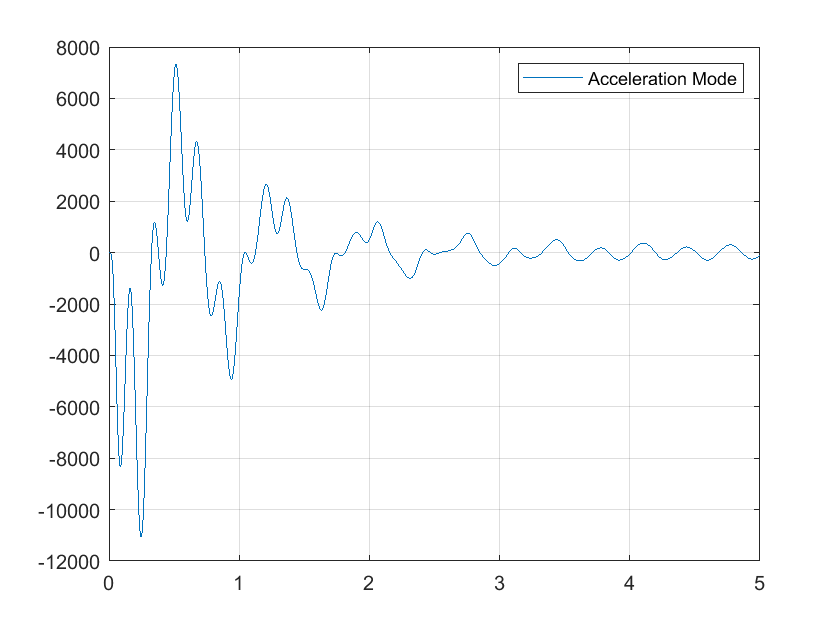

Maximum bending at root using direct recovery 11072.00 Nm



In [6]:
% Bending at root in response to 1-cosine gust

d = 15;
qqf = (1 - d/100)*qf;
err = zeros(1,length(i));

for i = 1:length(h)
    err(i) = abs(qqftest(i) - qqf);
end

[error,idd] = min(err);

UUf = aisa(idd)*Mach;
CCa = subs(CCa,{a rho}, {aisa(idd) rhoisa(idd)});
KKa = subs(KKa,{a rho}, {aisa(idd) rhoisa(idd)});
FF = subs(FF,{a rho}, {aisa(idd) rhoisa(idd)});


odefun = @(t,x) Gust(t, x, nfreq, MM, CC, CCa, KK, KKa, FF, UUf);

wg0 = 6.35;
Lg = 15.24;

tspan = 0:0.001:5;
tspan_gust = 0:0.001:Lg/UUf;
t_gust = [tspan_gust zeros(1,length(tspan)-length(tspan_gust))];

[t,z] = ode45(odefun,tspan,zeros(2*nfreq,1));

ddz = double([-inv(MM)*(CC-CCa) -inv(MM)*(KK-KKa)])*z' + double(inv(MM)\FF)*(wg0/2)*(1-cos(2*pi*UUf*t_gust/Lg))*(1/UUf);

qw = V(1:nw,1:nfreq)*z(:,nfreq+1:end)';

bending = double(subs(EI,ybar,0)*subs(ddNw,ybar,0)*qw);
bending2 = double(subs(EI,ybar,0)*subs(ddNw,ybar,0)*qw);


plot(t,bending); grid on;
legend('Acceleration Mode')
fprintf('Maximum bending at root using direct recovery %.2f Nm\n\n', max(abs(bending)))
